In [1]:
from SLGCA_Model import SLGCA
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import numpy as np
import warnings
from preprecess import *
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
os.environ['R_HOME'] = '/home/luxin1/miniconda3/envs/pytorch/lib/R'

In [2]:
adata = sc.read_h5ad("/home/luxin1/stDCL-Data/stDCL/STARmap_mouse_visual_cortex/STARmap_20180505_BY3_1k.h5ad")
adata.var_names_make_unique()

In [3]:
model = SLGCA(adata = adata, device=device, epochs=500,dim_output=64, n_top_genes=3000, n_neighbors=4,alpha=10,beta=0.6,gama=0.6)
adata = model.train()
from utils import clustering
tool = 'mclust'
radius = 50
clustering(adata, n_clusters=7, method=tool, radius=radius, refinement=True)

ARI = np.round(metrics.adjusted_rand_score(adata.obs['SLGCA'], adata.obs['label']), 2)
NMI = np.round(metrics.normalized_mutual_info_score(adata.obs['SLGCA'], adata.obs['label']), 2)
print(ARI, NMI)

Begin to train ST data...


100%|██████████| 500/500 [00:19<00:00, 25.25it/s]


Optimization finished for ST data!


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
0.62 0.7


<Axes: title={'center': 'SLGCA'}, xlabel='spatial1', ylabel='spatial2'>

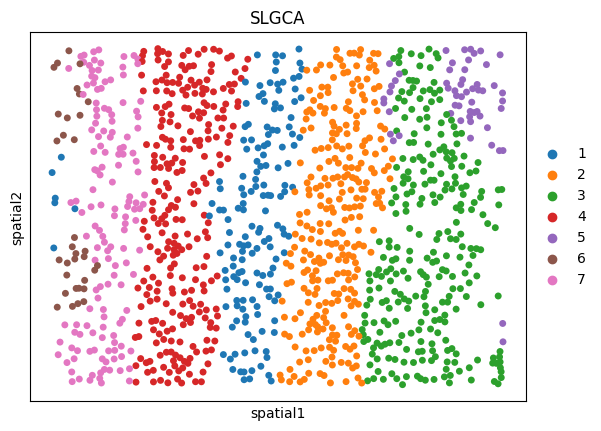

In [4]:
sc.pl.embedding(adata, basis='spatial', color='SLGCA', title='SLGCA',show=False)

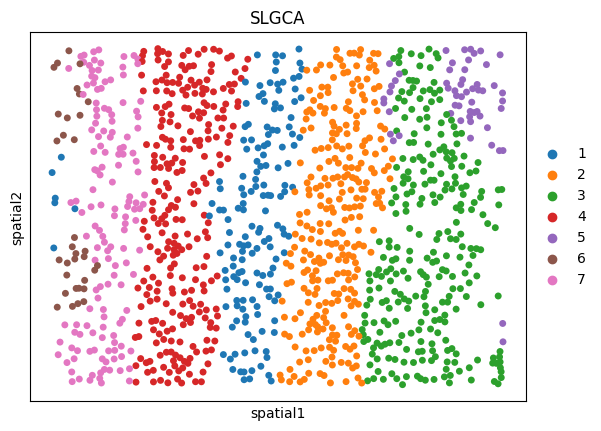

In [6]:
import matplotlib.pyplot as plt
sc.pl.embedding(adata, basis='spatial', color='SLGCA', title='SLGCA',show=False)
plt.savefig('/home/luxin1/Paper3/stGRLV2-result/STARmap.pdf', format='pdf', bbox_inches='tight',transparent=True)